### Prérecquis : 
- capsule *Configuration du robot*
- capsule *Prise en main d'un notebook Jupyter*
- capsule *Python : les bases*
- capsule *Python : les tableaux ndarrays de numpy*
- capsule *Python : tracé de courbes avec matplotlib*
- capsule *Python Orienté Objet*

### Acquis d'aprentissage visés : 
A l'issue de cette activité l'apprenant saura : 
- utiliser un notebook Jupyter pour faire bouger le robot 
- faire bouger le robot en utilisant les méthodes Reachy

## Créer une trajectoire 

In [1]:
import time
import numpy as np


from matplotlib import pyplot as plt

In [2]:
from reachy_sdk import ReachySDK

reachy = ReachySDK('localhost')

#### Trajectoire point par point pour le bras: 

In [10]:
reachy.turn_on('head')

In [4]:
reachy

right_arm.shoulder_pitch - pos:12.373999999999995 temp:40.0
right_arm.shoulder_roll - pos:-4.153999999999996 temp:40.0
right_arm.arm_yaw - pos:-8.484 temp:40.0
right_arm.elbow_pitch - pos:-74.418 temp:35.0
right_arm.hand.forearm_yaw - pos:1.906 temp:35.0
right_arm.hand.wrist_pitch - pos:-25.275 temp:37.0
right_arm.hand.wrist_roll - pos:0.733 temp:37.0
right_arm.hand.gripper - pos:13.93 temp:37.0


In [11]:
goto({
    'right_arm.shoulder_pitch': 0,
    'right_arm.shoulder_roll': 0,
    'right_arm.arm_yaw': 0,    
    'right_arm.elbow_pitch': -90,
    'right_arm.hand.forearm_yaw': 0,
    'right_arm.hand.wrist_pitch': 0,
    'right_arm.hand.wrist_roll': 0,
    'right_arm.hand.gripper': 0,
}, duration=3, wait=True)

reachy.right_arm.hand.forearm_yaw.goto(20, duration=2, wait=False)

reachy.right_arm.arm_yaw.goto(-10, duration=2, wait=False)

reachy.right_arm.hand.open()
time.sleep(5)
reachy.right_arm.hand.close()


False

In [12]:
for m in reachy.right_arm.motors:
    m.compliant = True

#### Trajectoire aléatoire pour la tête : 

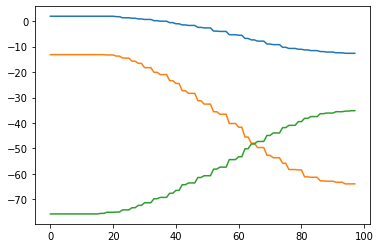

In [16]:
reachy.head.compliant = False

x = 0.5
y = (2 * np.random.rand() - 1) * 0.25
z = (2 * np.random.rand() - 1) * 0.25

duration = 1
 
reachy.head.look_at(x, y, z, duration=duration, wait=False)

real = []

t0 = time.time()
while time.time() - t0 < duration:
    real.append([d.rot_position for d in reachy.head.neck.disks])
    time.sleep(0.01)
    
plt.figure()
plt.plot(real)

In [15]:
reachy.head.compliant = True

#### Trajectoire qui suit une courbe sinus pour les antennes : 

In [17]:
for m in reachy.head.motors:
    m.compliant = False
    
t = np.linspace(0, 10, 1000)
pos = 30 * np.sin(2 * np.pi * 0.5 * t)

for p in pos:
    for m in reachy.head.motors:
        m.goal_position = p
    time.sleep(0.01)

In [48]:
reachy.head.compliant = True

## A toi de jouer ! 

Maintenant que tu sais tout sur les mouvements de Nemo, créer ta propre trajectoire en utilisant une des techniques énoncée plus haut.  